In [2]:
import pandas as pd
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 



In [3]:
# génération d'un dataset

genes =['gene'+ str(i) for i in range(1,101)]

wt= ['wt'+ str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [4]:
# création d'un dataframe

df= pd.DataFrame(columns=wt+ko, index=genes)

for gene in df.index:
    df.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    df.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

display(df.head())
print(df.shape)



,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,120,125,113,122,121,248,264,247,274,258
gene2,811,830,836,804,802,453,461,502,467,497
gene3,723,732,702,718,696,94,82,92,105,95
gene4,481,434,453,416,430,127,156,143,140,135
gene5,104,101,79,101,98,452,501,519,445,526


(100, 10)


In [5]:
#avant d'utiliser le PCA nous allons 'scale' les données:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_col = df.index

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.T)



pca=PCA()
pca_data = pca.fit_transform(scaled_data)




In [6]:
# Déterminons le % de la variance globale calculé pour chaque PC

pc_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
print(pc_var)
labels=['PC'+str(x) for x in range(1,len(pc_var)+1)]

[86.6  3.4  2.9  2.   1.9  1.1  0.9  0.9  0.4  0. ]


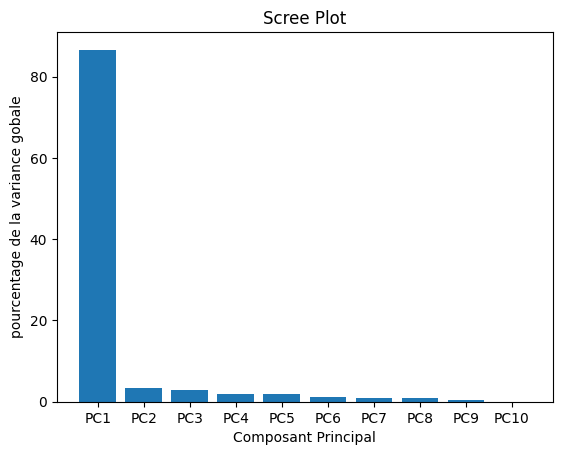

In [7]:
# Construction du Scree plot

plt.bar(x=labels,height=pc_var)
plt.ylabel('pourcentage de la variance gobale')
plt.xlabel('Composant Principal')
plt.title('Scree Plot')
plt.show()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.501218,1.581017,-2.559611,-0.235691,1.719593,-0.211691,0.185132,-0.961619,-0.951489,6.994199e-16
wt2,9.252837,-0.357336,2.919890,0.282960,2.388207,-0.773651,-0.718483,0.778337,0.245971,6.994199e-16
wt3,9.774400,-1.374098,-0.928084,-2.014627,-1.095504,0.116939,1.164480,1.568715,-0.031655,6.994199e-16
wt4,9.076356,-1.002088,-0.975137,2.250096,-1.806182,-1.420978,-0.158350,-0.602815,0.593890,6.994199e-16
wt5,8.894021,1.277172,1.608890,-0.116227,-1.231953,2.343529,-0.489334,-0.785418,0.164826,6.994199e-16
ko1,-9.180698,1.135567,-1.829522,-1.623015,0.704404,-0.081723,-0.769355,-0.157588,1.322219,6.994199e-16
ko2,-9.677683,3.990693,0.974513,0.904928,-0.890883,-0.630905,0.730073,0.867554,-0.301796,6.994199e-16
ko3,-9.566643,-1.951264,-1.403313,2.280407,0.998356,1.523240,0.037594,0.850144,-0.135291,6.994199e-16
ko4,-8.986483,-1.530336,0.469666,-1.124545,-1.232432,-0.608241,-1.745893,-0.111524,-0.970536,6.994199e-16
ko5,-9.087324,-1.769328,1.722707,-0.604286,0.446395,-0.256519,1.764136,-1.445786,0.063861,6.994199e-16


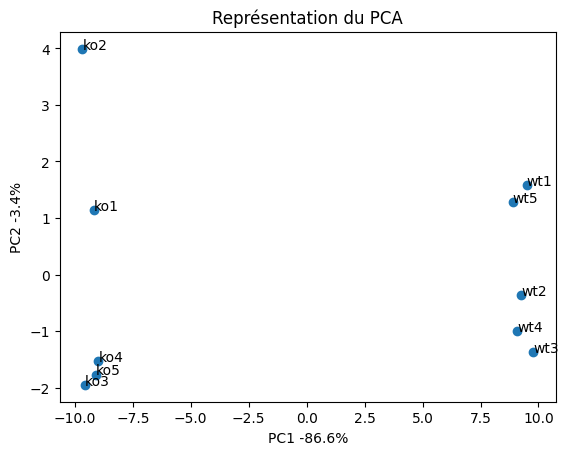

In [8]:
# construction d'un dataframe avec en index les nouvelles données 'scaled' et en colonne les PC's

pca_df= pd.DataFrame(pca_data, index=wt+ko,columns=labels)
display(pca_df)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('Représentation du PCA')
plt.xlabel('PC1 -{0}%'.format(pc_var[0]))
plt.ylabel('PC2 -{0}%'.format(pc_var[1]))

for x in pca_df.index:
    plt.annotate(x,(pca_df.PC1.loc[x],pca_df.PC2.loc[x]))

plt.show()

In [9]:
loading_scores =pd.Series(pca.components_[0],index=genes)

sorted_loading_scores= loading_scores.abs().sort_values(ascending=False)


top_10_genes = sorted_loading_scores[0:10].index.values
print(sorted_loading_scores[top_10_genes])

gene16    0.107436
gene92    0.107407
gene68    0.107406
gene78    0.107398
gene3     0.107398
gene74    0.107386
gene38    0.107344
gene48    0.107300
gene75    0.107280
gene7     0.107273
dtype: float64
